# 4. 신경망 시작하기: 분류와 회귀

## 4.1 영화 리뷰 분류: 이진 분류 문제

### 4.1.1 IMDB 데이터셋

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

리뷰를 다시 텍스트로 디코딩하기

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_index = " ".join(
    [reverse_word_index.get(i -3, "?") for i in train_data[0]])

In [7]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
decoded_index

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 4.1.2 데이터 준비

리스트 > 텐서 변환 두 가지 방법
- 같은 길이 되도록 리스트에 padding 추가, (samples, max_length) 크기 정수 텐서로 변환

&emsp;&emsp;&emsp;&emsp; 정수 텐서 다룰 수 있는 층으로 시작, Embedding layer

- multi-hot encoding하여 0과 1의 벡터로 변환

&emsp;&emsp;&emsp;&emsp; 부동 소수점 벡터 데이터를 다룰 수 있는 층으로 시작, Dense layer

>코드 4-3 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        for j in sequences:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

레이블을 벡터로 변환할 경우

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
y_train[0]

1.0

### 4.1.2 신경망 모델 만들기

입력 데이터가 벡터, 레이블은 스칼라</br>
&emsp;잘 작동하는 모델은 relu 활성화 함수 밀집 연결층

Dense 층 쌓을 때 두 가지 구조상 결정
- 얼마나 많은 층을 사용할 것인가?
- 각 층에 얼마나 많은 유닛을 둘 것인가?

>코드 4-4 모델 정의하기

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

Dense 층에 전달한 첫 번째 매개변수는 층의 unit 개수(표현 공간의 차원)

relu활성화 함수 사용 Dense 층은 다음과 같은 텐서 연산 열결하여 구현
```
output = relu(dot(W, input) + b)
```

16개의 유닛 > 가중치 행렬 W의 크기 (input_dimension, 16)

유닛을 늘리면 모델이 복잡한 표현을 학습 가능하지만 계산 비용 증가/원하지 않는 패턴 학습할 수도 있음

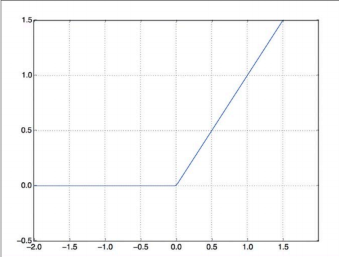

△ relu 함수, 음수를 0으로 만드는 함수

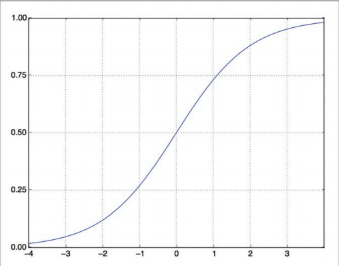

△ sigmoid 함수, 임의의 값을 [0, 1] 사이로 압축, 출력 값을 확률처럼 해석

이진 분류 문제/ 모델 출력이 확률</br>
&emsp; binary_crossentropy 손실이 적합

crossentropy: 확률 분포 간의 차이를 측정</br>
&emsp; 여기서는 원본 분포와 예측 분포 사이를 측정

옵티마이저로 rmsprop 사용, 일반적 모든 문제에 기본 선택으로 좋음

> 코드 4-5 모델 컴파일하기

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 4.1.4 훈련검증

원본 훈련 데이터에서 1만 개의 샘플을 떼어 검증 세트 만들기

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

512개 샘플씩 미니 배치 만들어 20번 에포크 동안 모델 훈련


동시에 따로 떼어 놓은 1만 개의 샘플에서 손실/정확도 층정

&emsp;> validation_data 매개변수에 검증 데이터 전달


>코드 4-7 모델 훈련하기

In [16]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),)

Epoch 1/20
30/30 [==============================] - 4s 57ms/step - loss: 0.4976 - accuracy: 0.7880 - val_loss: 0.4013 - val_accuracy: 0.8346
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2900 - accuracy: 0.9055 - val_loss: 0.2984 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2133 - accuracy: 0.9285 - val_loss: 0.2751 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1676 - accuracy: 0.9431 - val_loss: 0.2760 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1352 - accuracy: 0.9561 - val_loss: 0.3115 - val_accuracy: 0.8808
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1093 - accuracy: 0.9669 - val_loss: 0.2999 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0902 - accuracy: 0.9730 - val_loss: 0.3201 - val_accuracy: 0.8813
Epoch 8/20
30

model.fit() 메서드는 History 객체를 반환

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

> 코드 4-8 훈련과 검증 손실 그리기

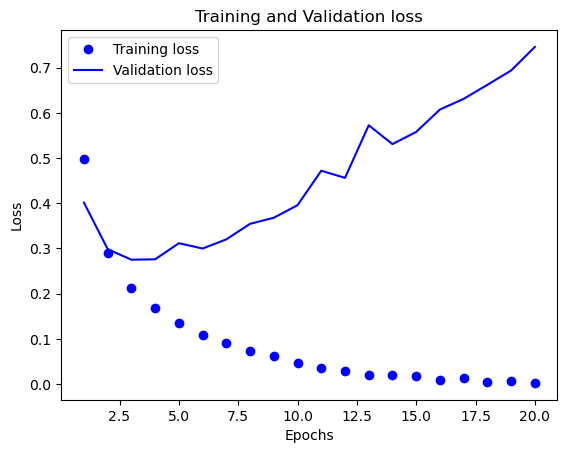

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

>코드 4-9 훈련과 검증 정확도 그리기

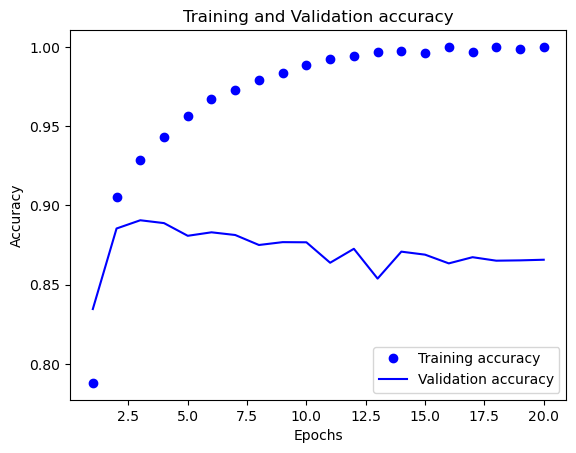

In [19]:
plt.clf()   # 그래프 초기화
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에서 잘 작동하지 않을 수 있다.

&emsp;과대적합(overfitting)되었다.

네 번째 에포크부터 훈련 데이터에 과도하게 최적화, 일반화 X

과대적합 방지 위해 네 번째 에포크 이후에 훈련 중지할 수 있다.

>코드 4-10 모델을 처음부터 다시 훈련하기

In [20]:
import tensorflow as tf

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)
print(results)  # [테스트 손실, 테스트 정확도]

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4530 - accuracy: 0.8251
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2590 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1971 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3290 - accuracy: 0.8705
[0.328991174697876, 0.8704800009727478]


### 4.1.5 훈련된 모델을 새로운 데이터에 대해 예측하기

In [23]:
print(model.predict(x_test))

782/782 [==============================] - 2s 3ms/step
[[0.1511501 ]
 [0.99982345]
 [0.546082  ]
 ...
 [0.09360052]
 [0.03478712]
 [0.42824742]]
